# Question

**Les livraisons effectuées en retard sont-elles moins bien notées ?**

In [2]:
# Importer les données.

import requests
import zipfile
import sqlite3
import pandas as pd

# Ici, nous téléchargeons le fichier de GitHub 
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Puis on le décompresse
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Nous nous connectons à la base de données
conn = sqlite3.connect('olist.sqlite')

In [3]:
# Voici une requête spécifique pour lister le nom des tables
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [4]:
# Définir le tableau de "orders_dataset"

orders_dataset_sql = pd.read_sql("select * from orders_dataset ", conn)
orders_dataset_sql

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [5]:
# Définir le tableau de "order_reviews_dataset"

order_reviews_dataset_sql = pd.read_sql("select * from order_reviews_dataset ", conn)
order_reviews_dataset_sql

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
# Créez un nouveau tableau avec les informations de date de livraison et les notes données par les clients.

tbd = pd.merge(orders_dataset_sql, order_reviews_dataset_sql, how='inner')
tbd

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,None,None,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,None,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,None,None,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,None,None,2017-03-22 00:00:00,2017-03-23 11:02:08
99220,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99221,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,None,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99222,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [7]:
tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99224 non-null  object
 1   customer_id                    99224 non-null  object
 2   order_status                   99224 non-null  object
 3   order_purchase_timestamp       99224 non-null  object
 4   order_approved_at              99068 non-null  object
 5   order_delivered_carrier_date   97468 non-null  object
 6   order_delivered_customer_date  96359 non-null  object
 7   order_estimated_delivery_date  99224 non-null  object
 8   review_id                      99224 non-null  object
 9   review_score                   99224 non-null  int64 
 10  review_comment_title           11566 non-null  object
 11  review_comment_message         40950 non-null  object
 12  review_creation_date           99224 non-null  object
 13  r

In [8]:
# Convertir tous les types de date de "object" dans la table en "datatime".

tbd['order_delivered_carrier_date'] = pd.to_datetime(tbd['order_delivered_carrier_date'])
tbd['order_estimated_delivery_date'] = pd.to_datetime(tbd['order_estimated_delivery_date'])
tbd['order_delivered_customer_date'] = pd.to_datetime(tbd['order_delivered_customer_date'])
tbd['review_creation_date'] = pd.to_datetime(tbd['review_creation_date'])
tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99224 non-null  object        
 1   customer_id                    99224 non-null  object        
 2   order_status                   99224 non-null  object        
 3   order_purchase_timestamp       99224 non-null  object        
 4   order_approved_at              99068 non-null  object        
 5   order_delivered_carrier_date   97468 non-null  datetime64[ns]
 6   order_delivered_customer_date  96359 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99224 non-null  datetime64[ns]
 8   review_id                      99224 non-null  object        
 9   review_score                   99224 non-null  int64         
 10  review_comment_title           11566 non-null  object        
 11  review_comment_

In [9]:
from datetime import date

# Dans cette fonction, je calcule combien des jours avant/après la date prévue les livraisons sont-ils effectuées.
# Si nombre des jours est négative, ça montre la livraison effectuée en retard.

data =  tbd['order_estimated_delivery_date'] - tbd['order_delivered_customer_date']
tbd['nombre_des_jours'] = data.dt.days
tbd[['nombre_des_jours']]


,nombre_des_jours
0,7.0
1,5.0
2,17.0
3,12.0
4,9.0
...,...
99219,10.0
99220,1.0
99221,5.0
99222,20.0


In [10]:
# Création d'un nouveau tableau qui montre seulement les livraison effectuées en retard.

orders_delivered_late = tbd.loc[tbd['nombre_des_jours'] < 0]
orders_delivered_late

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nombre_des_jours
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,38cae21b1b57a95959440380d5b2ef7a,2,None,os correios estäo em greve... näo recebi nenhu...,2017-10-01,2017-10-01 17:55:21,-12.0
24,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,6a1a8e54de03ab98e6e8ff56e56e507f,2,None,Demora muito entregar. Já passou o prazo e ain...,2018-03-16,2018-03-20 23:10:58,-10.0
34,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,f121467a10eee0929f364c7d62abc9b5,5,None,há muito tempo efetuo compras atraves desta lo...,2018-03-20,2018-03-23 22:56:05,-1.0
40,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,5caca29ffffe9086162ca51303817420,1,None,"Inicialmente, na data da compra o produto era ...",2017-12-22,2017-12-28 11:25:32,-8.0
56,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,4ff7c437ae60fa0b3c700ade55155027,1,None,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04,2018-04-04 09:31:50,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,103d39074fa26b7bfd65101962bbec58,2,None,Não recebi o produto.,2018-08-18,2018-08-18 17:13:46,-6.0
99180,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,d6e89c99dd004e190fb802797253e9ba,1,None,"Nao volto a comprar com esta loja , demorando ...",2018-04-04,2018-04-04 10:15:42,-4.0
99206,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,4a57b77d844594f24904a568218a2d96,1,None,nao recebi o produto que ja paguei ! nao recom...,2017-11-03,2017-11-06 18:50:22,-22.0
99208,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1,None,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11,2018-04-11 12:41:03,-3.0


In [11]:
# Calculer la validité de l'avis

reviews_after_estimatedDate = orders_delivered_late.loc[orders_delivered_late['order_estimated_delivery_date'] < orders_delivered_late['review_answer_timestamp']]
reviews_after_estimatedDate


#   Le nouveau tableau montre les avis effectués après le date prévue des livraisons. 
#   C'est-à-dire que les avis dans le tableau contiennent également justement les avis données par les clients à cause de ses livraisons en retard.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nombre_des_jours
19,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,38cae21b1b57a95959440380d5b2ef7a,2,None,os correios estäo em greve... näo recebi nenhu...,2017-10-01,2017-10-01 17:55:21,-12.0
24,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,6a1a8e54de03ab98e6e8ff56e56e507f,2,None,Demora muito entregar. Já passou o prazo e ain...,2018-03-16,2018-03-20 23:10:58,-10.0
34,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,f121467a10eee0929f364c7d62abc9b5,5,None,há muito tempo efetuo compras atraves desta lo...,2018-03-20,2018-03-23 22:56:05,-1.0
40,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,5caca29ffffe9086162ca51303817420,1,None,"Inicialmente, na data da compra o produto era ...",2017-12-22,2017-12-28 11:25:32,-8.0
56,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,4ff7c437ae60fa0b3c700ade55155027,1,None,"Pedir 2 capinhas,estou pagando as duas e só ve...",2018-04-04,2018-04-04 09:31:50,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99179,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,103d39074fa26b7bfd65101962bbec58,2,None,Não recebi o produto.,2018-08-18,2018-08-18 17:13:46,-6.0
99180,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,d6e89c99dd004e190fb802797253e9ba,1,None,"Nao volto a comprar com esta loja , demorando ...",2018-04-04,2018-04-04 10:15:42,-4.0
99206,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,4a57b77d844594f24904a568218a2d96,1,None,nao recebi o produto que ja paguei ! nao recom...,2017-11-03,2017-11-06 18:50:22,-22.0
99208,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,6b2ee488cd87d8a9ee67eb63ad5a7a4c,1,None,"Prateleiras com cantos vivo, colunas nao encai...",2018-04-11,2018-04-11 12:41:03,-3.0


In [12]:
reviews_after_estimatedDate['review_score'].value_counts()

1    3541
5    1687
4     940
3     866
2     601
Name: review_score, dtype: int64

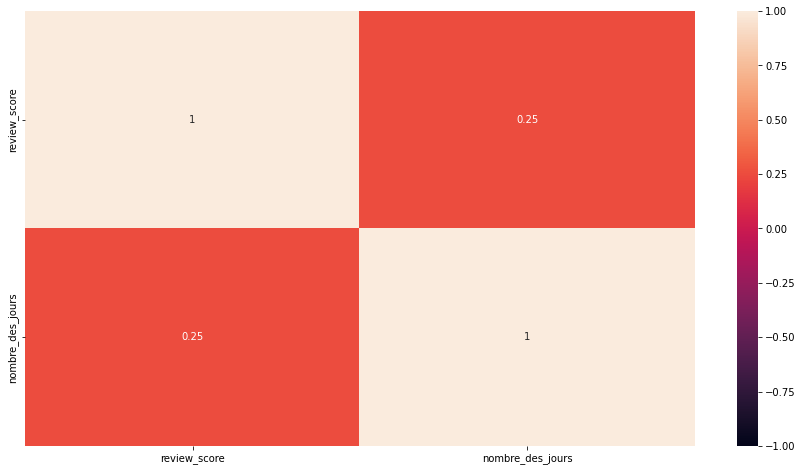

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

cor_matrix = reviews_after_estimatedDate.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor_matrix, annot=True, vmin=-1, vmax=1)

On voit qu'il y a une petite correlation entre les moins notées et les livraisons effectuées en retard. Mais cette correlation n'est pas très forte.

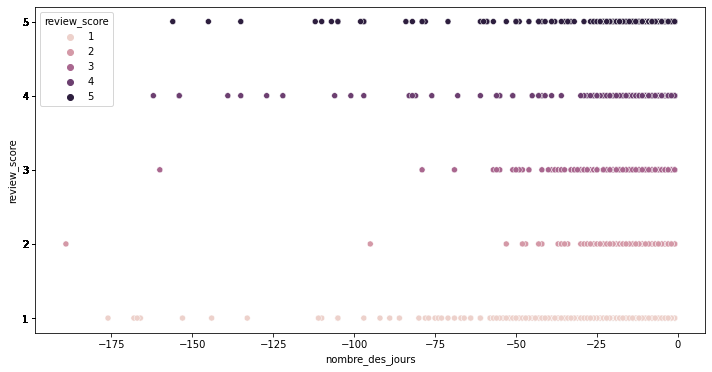

In [14]:
plt.subplots(figsize = (12,6))
sns.scatterplot(data= reviews_after_estimatedDate , x='nombre_des_jours', y=reviews_after_estimatedDate["review_score"], hue="review_score")
plt.yticks(reviews_after_estimatedDate["review_score"])
plt.show()

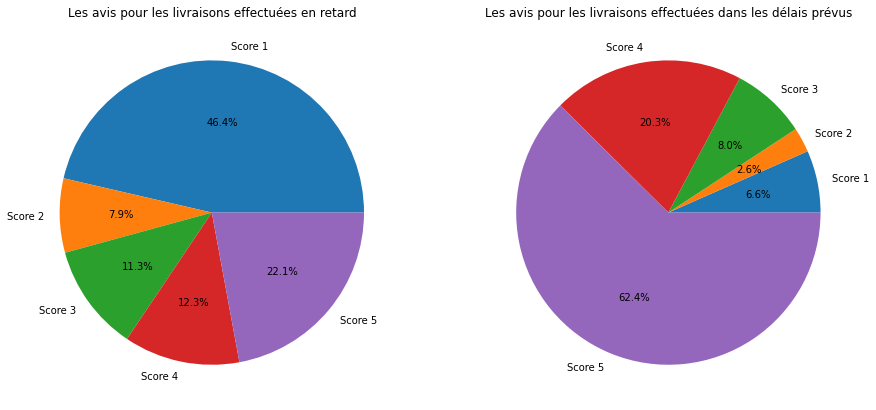

In [26]:


# Les avis pour les livraisons effectuées en retard

plt.subplots(figsize = (15,8))

plt.subplot(121)
percentage1 = reviews_after_estimatedDate['review_score'].value_counts(normalize=True)*100
percentage1 = percentage1.sort_index()
opinion = ["Score 1", "Score 2", "Score 3", "Score 4", "Score 5"]
plt.pie(percentage1, labels=opinion, autopct='%1.1f%%')
plt.title("Les avis pour les livraisons effectuées en retard")


# Les avis pour les livraisons effectuées dans les délais prévus 

plt.subplot(122)
delivery_on_time = tbd.loc[tbd['nombre_des_jours'] >= 0]
percentage2 = delivery_on_time['review_score'].value_counts(normalize=True)*100
percentage2 = percentage2.sort_index()
opinion = ["Score 1", "Score 2", "Score 3", "Score 4", "Score 5"]
plt.pie(percentage2, labels=opinion, autopct='%1.1f%%')
plt.title("Les avis pour les livraisons effectuées dans les délais prévus")

plt.show()

Dans les graphiques de camambert au déssus, on voit que le note 1 dans les avis pour les livraisons effectuées en retard est majorité avec le pourcentage %46.4. En plus, dans la même camambert, le note 5 est au deuxieme rang avec le pourcentage %22.1. 

Dans la deuxième camambert, le note 5 est c'est un score le plus noté avec le pourcentage %62.4 et le note 1 est le moins noté avec le note 2 avec le pourcentage %6.6. 

Ces deux graphiques nous montre que globalement, les livraisons effectuées en retard est moins notées avec le pourcentage %46.4 du note 1 par rapport aux avis pour les livraisons effectuées dans les délais prévues. Mais quand même, on voit également le note 5 avec le pourcentage %22.1 dans les livraisons effectuées en retard. Ça nous prouve qu'il n'y a pas de correlation très forte pour notre question comme j'ai déja mentionné. 

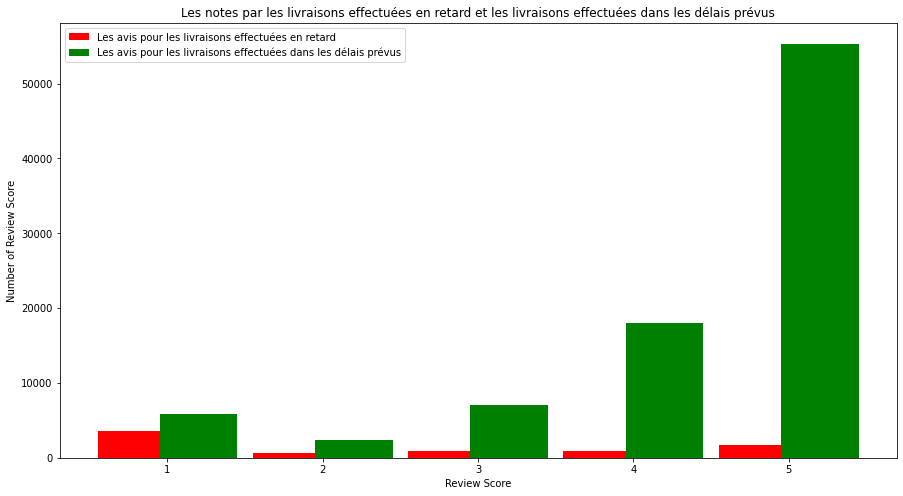

In [30]:
delivery_on_time = tbd.loc[tbd['nombre_des_jours'] >= 0]


plt.subplots(figsize = (15,8))

n=5
r = np.arange(n)
width = 0.4


y = list(reviews_after_estimatedDate['review_score'].value_counts().sort_index())
yx = list(delivery_on_time['review_score'].value_counts().sort_index())

plt.bar(r, y, 0.5, color='red', label= "Les avis pour les livraisons effectuées en retard")
plt.bar(r+width, yx, 0.5, color='green', label="Les avis pour les livraisons effectuées dans les délais prévus")

plt.xlabel("Review Score")
plt.ylabel('Number of Review Score')
plt.title("Les notes par les livraisons effectuées en retard et les livraisons effectuées dans les délais prévus")

plt.xticks(r + width/2,['1', '2', '3', '4', '5'])
plt.legend()
plt.show()

In [18]:
y

[3541, 601, 866, 940, 1687]

In [19]:
reviews_after_estimatedDate['review_score'].value_counts().sort_index()

1    3541
2     601
3     866
4     940
5    1687
Name: review_score, dtype: int64

In [20]:
yx

[5855, 2335, 7086, 18033, 55349]

In [21]:
delivery_on_time['review_score'].value_counts().sort_index()

1     5855
2     2335
3     7086
4    18033
5    55349
Name: review_score, dtype: int64